In [1]:
# Library imports.
from pyswmm import Simulation, Links, Output
from swmm.toolkit.shared_enum import LinkAttribute, NodeAttribute, SubcatchAttribute
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
import time

# Local imports.
from urbansurge import swmm_model, analysis_tools

In [2]:
# Path to configuration file.
config_path = r"C:\Users\ay434\Box\Research\NSF_SCC\SWMM\Canandaigua\Canandaigua_SWMM\canandaigua_config.yml"

In [14]:
# Create instance of SWMM model.
swmm = swmm_model.SWMM(config_path)

# Configure model.
swmm.configure_model()

Simulation info
Flow Units: CFS
System Units: US
Start Time: 2017-01-01 00:00:00
Start Time: 2017-01-02 00:00:00


In [36]:
# Seepage rate settings.
link_id = 2
seepage_values = list(np.linspace(1, 10, 10))
seepage_values.append(6.5)
print(seepage_values)

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 6.5]


In [37]:
# List of output data frames.
output_df_list = []

# Run the simulation with different roughness settings.
for i, seepage_rate in enumerate(seepage_values):
    # Update the link roughness.
    swmm.set_link_seepage(link_id, seepage_rate)
    
    # Run the simulation.
    swmm.run_simulation()
    
    # OUTPUT TO DATA FRAME
    # ---------------------------------------------------------------------
    # Get the node depths.
    node_depth_df = swmm.get_node_depth()

    # Get node flooding.
    node_flood_df = swmm.get_node_flooding()
    
    # Get node inflow.
    node_total_inflow_df = swmm.get_node_total_inflow()

    # Get link flow.
    link_flow_df = swmm.get_link_flow()
    
    # Get link depth.
    link_depth_df = swmm.get_link_depth()
    
    # Get link velocity.
    link_velocity_df = swmm.get_link_velocity()

    # Get precipitation time series.
    prcp_df = swmm.get_rainfall_timeseries()

    # Join data frames.
    fault_df = node_depth_df.merge(node_flood_df, on='datetime')
    fault_df = fault_df.merge(node_total_inflow_df, on='datetime')
    fault_df = fault_df.merge(link_flow_df, on='datetime')
    fault_df = fault_df.merge(link_depth_df, on='datetime')
    fault_df = fault_df.merge(link_velocity_df, on='datetime')
    fault_df = fault_df.merge(prcp_df, on='datetime')

    # Add experiment name.
    fault_df['Experiment'] = f'E_{i}'
        
    # Add link roughness.
    fault_df[f'L{link_id}_seepage'] = seepage_rate

    # Add to list.
    output_df_list.append(fault_df)

    # ---------------------------------------------------------------------
    
output_df = pd.concat(output_df_list)

Updated Seepage value to 1.0 for 2 in 2
Set Link 2 seepage rate to 1.0
2017-01-01 00:00:01 , 0
2017-01-01 00:50:01 , 3
2017-01-01 01:37:18 , 7
2017-01-01 02:05:21 , 9
2017-01-01 02:27:34 , 10
2017-01-01 02:48:17 , 12
2017-01-01 03:08:15 , 13
2017-01-01 03:28:04 , 14
2017-01-01 03:47:52 , 16
2017-01-01 04:07:43 , 17
2017-01-01 04:27:50 , 19
2017-01-01 04:48:22 , 20
2017-01-01 05:09:27 , 21
2017-01-01 05:31:21 , 23
2017-01-01 05:54:13 , 25
2017-01-01 06:18:09 , 26
2017-01-01 06:44:01 , 28
2017-01-01 07:12:08 , 30
2017-01-01 07:42:34 , 32
2017-01-01 08:15:25 , 34
2017-01-01 08:50:46 , 37
2017-01-01 09:28:44 , 39
2017-01-01 10:09:24 , 42
2017-01-01 10:52:55 , 45
2017-01-01 11:39:22 , 49
2017-01-01 12:28:45 , 52
2017-01-01 13:18:45 , 55
2017-01-01 14:08:45 , 59
2017-01-01 14:58:45 , 62
2017-01-01 15:48:45 , 66
2017-01-01 16:38:45 , 69
2017-01-01 17:28:45 , 73
2017-01-01 18:18:45 , 76
2017-01-01 19:08:45 , 80
2017-01-01 19:58:45 , 83
2017-01-01 20:48:45 , 87
2017-01-01 21:38:45 , 90
2017-01-

Updated Seepage value to 9.0 for 2 in 2
Set Link 2 seepage rate to 9.0
2017-01-01 00:00:01 , 0
2017-01-01 00:50:01 , 3
2017-01-01 01:37:25 , 7
2017-01-01 02:05:29 , 9
2017-01-01 02:27:48 , 10
2017-01-01 02:48:35 , 12
2017-01-01 03:08:37 , 13
2017-01-01 03:28:27 , 14
2017-01-01 03:48:17 , 16
2017-01-01 04:08:11 , 17
2017-01-01 04:28:26 , 19
2017-01-01 04:49:12 , 20
2017-01-01 05:10:25 , 22
2017-01-01 05:32:29 , 23
2017-01-01 05:55:34 , 25
2017-01-01 06:19:46 , 26
2017-01-01 06:46:02 , 28
2017-01-01 07:14:42 , 30
2017-01-01 07:45:51 , 32
2017-01-01 08:19:39 , 35
2017-01-01 08:56:14 , 37
2017-01-01 09:35:49 , 40
2017-01-01 10:18:37 , 43
2017-01-01 11:04:51 , 46
2017-01-01 11:54:23 , 50
2017-01-01 12:44:23 , 53
2017-01-01 13:34:23 , 57
2017-01-01 14:24:23 , 60
2017-01-01 15:14:23 , 63
2017-01-01 16:04:23 , 67
2017-01-01 16:54:23 , 70
2017-01-01 17:44:23 , 74
2017-01-01 18:34:23 , 77
2017-01-01 19:24:23 , 81
2017-01-01 20:14:23 , 84
2017-01-01 21:04:23 , 88
2017-01-01 21:54:23 , 91
2017-01-

In [44]:
print(output_df.columns)
output_df.head()

Index(['Depth_node_15', 'Depth_node_16', 'Depth_node_18', 'Depth_node_19',
       'Depth_node_20', 'Depth_node_12', 'Depth_node_13', 'Depth_node_14',
       'Depth_node_17', 'datetime', 'Flood_node_15', 'Flood_node_16',
       'Flood_node_18', 'Flood_node_19', 'Flood_node_20', 'Flood_node_12',
       'Flood_node_13', 'Flood_node_14', 'Flood_node_17',
       'Total_Inflow_node_15', 'Total_Inflow_node_16', 'Total_Inflow_node_18',
       'Total_Inflow_node_19', 'Total_Inflow_node_20', 'Total_Inflow_node_12',
       'Total_Inflow_node_13', 'Total_Inflow_node_14', 'Total_Inflow_node_17',
       'Flow_link_1', 'Flow_link_2', 'Flow_link_5', 'Flow_link_6',
       'Flow_link_7', 'Flow_link_8', 'Flow_link_9', 'Flow_link_10',
       'Depth_link_1', 'Depth_link_2', 'Depth_link_5', 'Depth_link_6',
       'Depth_link_7', 'Depth_link_8', 'Depth_link_9', 'Depth_link_10',
       'Velocity_link_1', 'Velocity_link_2', 'Velocity_link_5',
       'Velocity_link_6', 'Velocity_link_7', 'Velocity_link_8',
    

,Depth_node_15,Depth_node_16,Depth_node_18,Depth_node_19,Depth_node_20,Depth_node_12,Depth_node_13,Depth_node_14,Depth_node_17,datetime,...,Velocity_link_2,Velocity_link_5,Velocity_link_6,Velocity_link_7,Velocity_link_8,Velocity_link_9,Velocity_link_10,prcp,Experiment,L2_seepage
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017-01-01 00:10:00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,E_0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017-01-01 00:20:00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,E_0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017-01-01 00:30:00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,E_0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017-01-01 00:40:00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,E_0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017-01-01 00:50:00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,E_0,1.0


C:\Users\ay434\AppData\Local\Temp\ipykernel_18448\690232185.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
C:\Users\ay434\AppData\Local\Temp\ipykernel_18448\690232185.py:31: RuntimeWarning: invalid value encountered in divide
  Rh = A / P


Link Slope = -0.02


C:\Users\ay434\AppData\Local\Temp\ipykernel_18448\690232185.py:53: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')


[1689.6203076168895, 1678.1793268099427, 1666.3161297068, 1657.8150502964854, 1647.5651180818677, 1638.937123157084, 1630.9561217352748, 1623.3360938504338, 1615.9439013525844, 1608.809146232903, 1634.8793900832534]


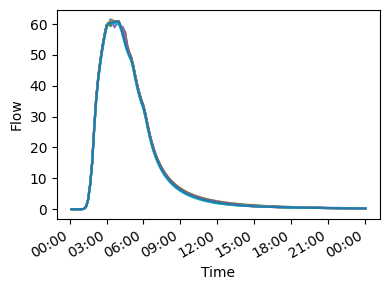

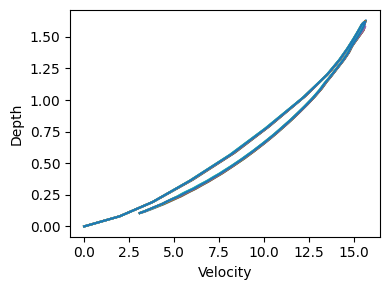

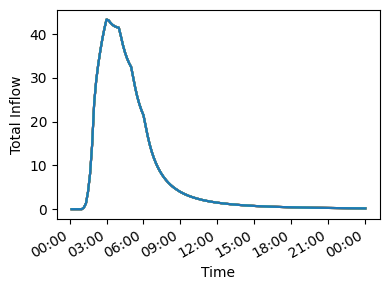

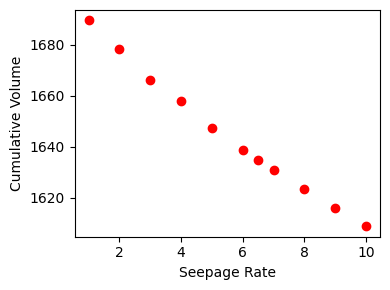

In [42]:
# Plot the output for a certain link.
plot_link_id = 8
plot_node_id = 18

# Flow time series.
fig, ax = plt.subplots(figsize=(4,3))
for i, sr in enumerate(seepage_values):
    plot_df = output_df.loc[output_df[f'L{link_id}_seepage'] == sr, :]
    ax.plot(plot_df['datetime'], plot_df[f'Flow_link_{plot_link_id}'], label=sr)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
# ax.legend()
ax.set_xlabel('Time')
ax.set_ylabel('Flow')
fig.tight_layout()
# fig.savefig(r"C:\Users\ay434\Box\Research\NSF_SCC\SWMM\Canandaigua\Output\Figures\rough_L{}_flow.png".format(plot_link_id),
#             dpi=300)

# Depth vs. velocity.
# Manning's theoretical.
link_n = swmm.get_link_roughness(plot_link_id)
link_S = swmm.get_link_slope(plot_link_id)
print(f'Link Slope = {link_S}')
link_geom = swmm.get_link_geometry(plot_link_id)
link_D = link_geom[0]
C = (1 / link_n) * np.abs(link_S)**(1/2)
link_d = np.linspace(0, link_D, 100)
theta = 2 * np.arccos(1 - (2 * link_d / link_D))
A = (link_D**2 / 8) * (theta - np.sin(theta))
P = link_D * theta / 2
Rh = A / P
v = C * Rh**(2/3)

fig, ax = plt.subplots(figsize=(4,3))
for i, sr in enumerate(seepage_values):
    plot_df = output_df.loc[output_df[f'L{link_id}_seepage'] == sr, :]
    ax.plot(plot_df[f'Velocity_link_{plot_link_id}'], plot_df[f'Depth_link_{plot_link_id}'], label=sr)
# ax.plot(v, link_d, 'r--')
# ax.legend()
ax.set_xlabel('Velocity')
ax.set_ylabel('Depth')
fig.tight_layout()
# fig.savefig(r"C:\Users\ay434\Box\Research\NSF_SCC\SWMM\Canandaigua\Output\Figures\rough_L{}_dv.png".format(plot_link_id),
#             dpi=300)

# Node inflow and depth.
fig, ax = plt.subplots(figsize=(4,3))
for i, sr in enumerate(seepage_values):
    plot_df = output_df.loc[output_df[f'L{link_id}_seepage'] == sr, :]
    ax.plot(plot_df['datetime'], plot_df[f'Total_Inflow_node_{plot_node_id}'], label=sr)
# ax.legend()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
ax.set_xlabel('Time')
ax.set_ylabel('Total Inflow')
fig.tight_layout()

# Flow difference.
fig, ax = plt.subplots(figsize=(4,3))
diffs = []
for i, sr in enumerate(seepage_values):
    plot_df = output_df.loc[output_df[f'L{link_id}_seepage'] == sr, :]
    diff =  plot_df[f'Flow_link_{plot_link_id}'].sum()
    diffs.append(diff)
ax.plot(seepage_values, diffs, 'ro')
# ax.legend()
ax.set_xlabel('Seepage Rate')
ax.set_ylabel('Cumulative Volume')
fig.tight_layout()

print(diffs)